

NAME   ----> RONIT BALANI  

E-MAIL ----> balanironit.bhushan.mst22@itbhu.ac.in

BATCH  ----> DATA SCIENCE (MARCH-APRIL)

PROJECT 1 (TAXI-FARE)



In [366]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [367]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [368]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [369]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
21769,30:41.0,12.1,2010-02-03 09:30:41 UTC,-73.990139,40.714153,-73.970640,40.758416,1
30321,22:10.0,12.0,2015-01-14 16:22:10 UTC,-73.979599,40.752640,-73.958412,40.763145,1
39647,13:00.0,7.3,2012-04-05 10:13:00 UTC,-73.964285,40.775158,-73.976615,40.762943,1
13890,40:00.0,23.3,2009-05-04 20:40:00 UTC,-73.986358,40.758690,-73.980195,40.670477,2
21991,44:00.0,12.0,2014-08-06 19:44:00 UTC,-74.016210,40.714992,-74.000683,40.742325,1
17732,44:00.0,6.0,2012-11-10 11:44:00 UTC,-73.989795,40.752185,-74.004248,40.740542,2
7467,27:08.0,8.5,2014-06-08 14:27:08 UTC,-73.992879,40.730183,-73.992083,40.749051,1
6999,17:10.0,6.1,2010-05-13 06:17:10 UTC,-73.957768,40.768509,-73.974209,40.754678,1
41886,04:10.0,15.0,2014-12-17 08:04:10 UTC,-73.980615,40.782709,-73.952048,40.790297,1
45757,50:00.0,5.7,2009-02-06 09:50:00 UTC,-73.982283,40.758355,-73.977672,40.750928,1


In [370]:
df.shape

(50000, 8)

In [371]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [373]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [374]:
df.describe(include='all')

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [376]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

<Axes: ylabel='amount'>

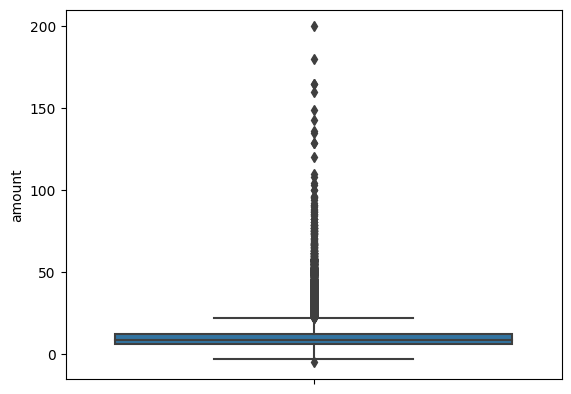

In [377]:
sns.boxplot(y='amount',data=df)

<Axes: ylabel='longitude_of_pickup'>

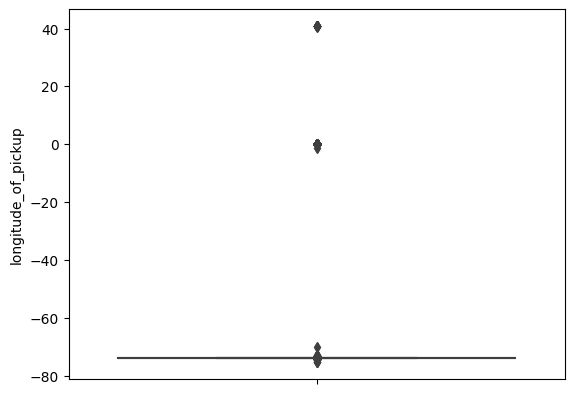

In [378]:
sns.boxplot(y='longitude_of_pickup',data=df)

<Axes: ylabel='latitude_of_pickup'>

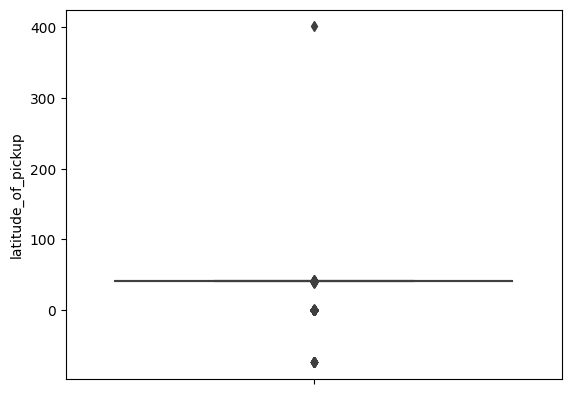

In [379]:
sns.boxplot(y='latitude_of_pickup',data=df)

<Axes: ylabel='longitude_of_dropoff'>

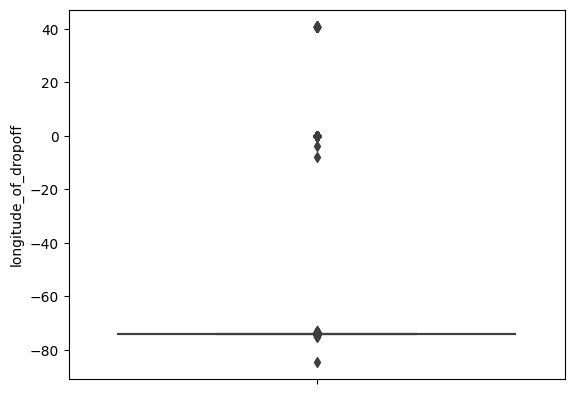

In [380]:
sns.boxplot(y='longitude_of_dropoff',data=df)

<Axes: ylabel='latitude_of_dropoff'>

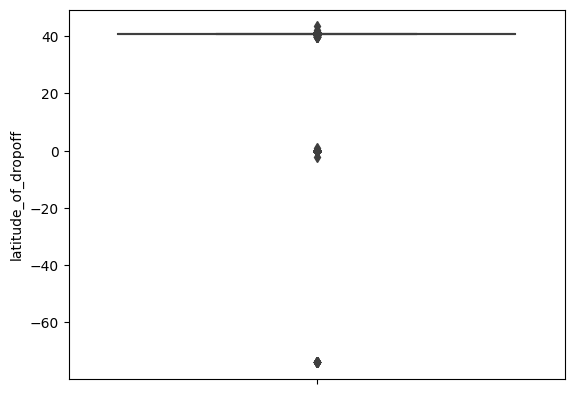

In [381]:
sns.boxplot(y='latitude_of_dropoff',data=df)

In [382]:
df=df.drop("unique_id",axis=1)

In [383]:
df[df['amount']<=0]


,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
2039,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
10002,0.0,2010-02-15 14:26:01 UTC,-73.987115,40.738808,-74.005911,40.713960,1
13032,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
27891,0.0,2015-05-15 21:40:28 UTC,-74.077927,40.805714,-74.077919,40.805721,1
28839,-2.5,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,-2.5,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
42337,-5.0,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1
47302,0.0,2010-03-18 19:13:39 UTC,-73.942346,40.806269,-73.942463,40.806129,1


In [384]:
df.drop(df[df['amount']<=0].index,axis=0)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [386]:
df['date_time_of_pickup'] = pd.to_datetime(df.date_time_of_pickup)

In [387]:
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df['haversine_distance'] = haversine_distance(df['latitude_of_pickup'].values, 
                                                     df['longitude_of_pickup'].values, 
                                                     df['latitude_of_dropoff'].values, 
                                                     df['longitude_of_dropoff'].values)

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   amount                50000 non-null  float64            
 1   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 2   longitude_of_pickup   50000 non-null  float64            
 3   latitude_of_pickup    50000 non-null  float64            
 4   longitude_of_dropoff  50000 non-null  float64            
 5   latitude_of_dropoff   50000 non-null  float64            
 6   no_of_passenger       50000 non-null  int64              
 7   haversine_distance    50000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 3.1 MB


In [389]:
df['haversine_distance'].head(10)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
5    3.787239
6    1.555807
7    4.155444
8    1.253232
9    2.849627
Name: haversine_distance, dtype: float64

In [390]:
df['haversine_distance'].median(), df['haversine_distance'].mean()

(2.120114184225849, 18.508946463680736)

In [391]:
df.loc[:, 'Hour'] = df['date_time_of_pickup'].dt.hour
df.loc[:, 'Weekday'] = df['date_time_of_pickup'].dt.day_name()
df.loc[:, 'Date'] = df['date_time_of_pickup'].dt.day
df.loc[:, 'Month'] = df['date_time_of_pickup'].dt.month
df.loc[:, 'Day'] = df['date_time_of_pickup'].dt.dayofweek

1. Does the number of passengers affect the fare?

Text(0, 0.5, 'Frequency')

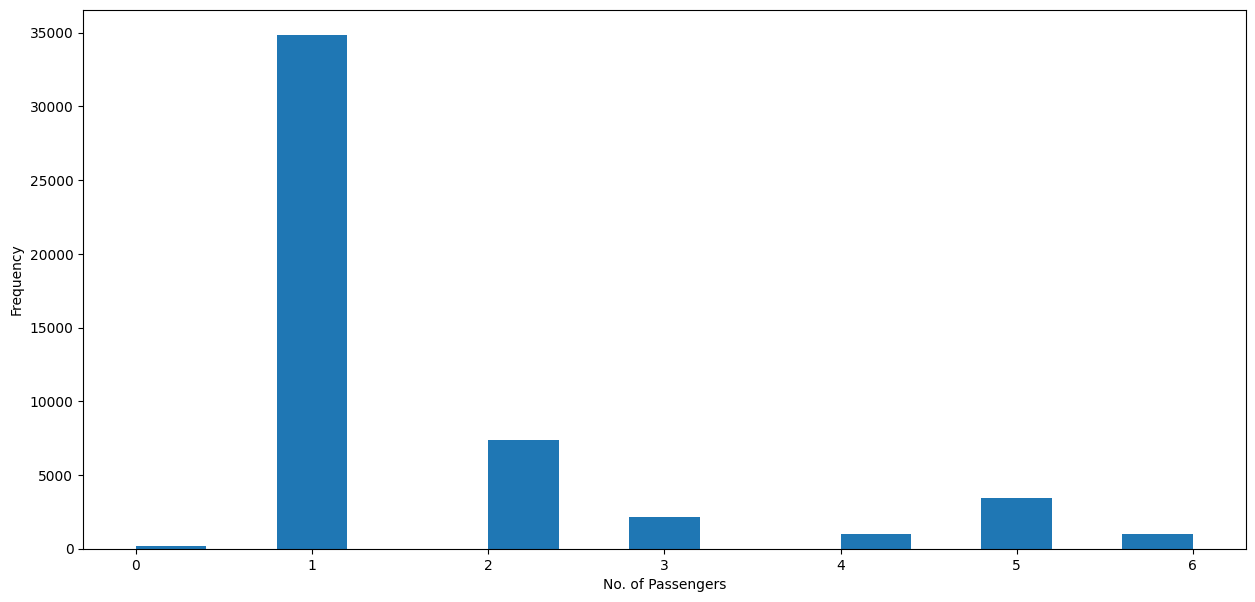

In [392]:
plt.figure(figsize=(15,7))
plt.hist(df['no_of_passenger'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

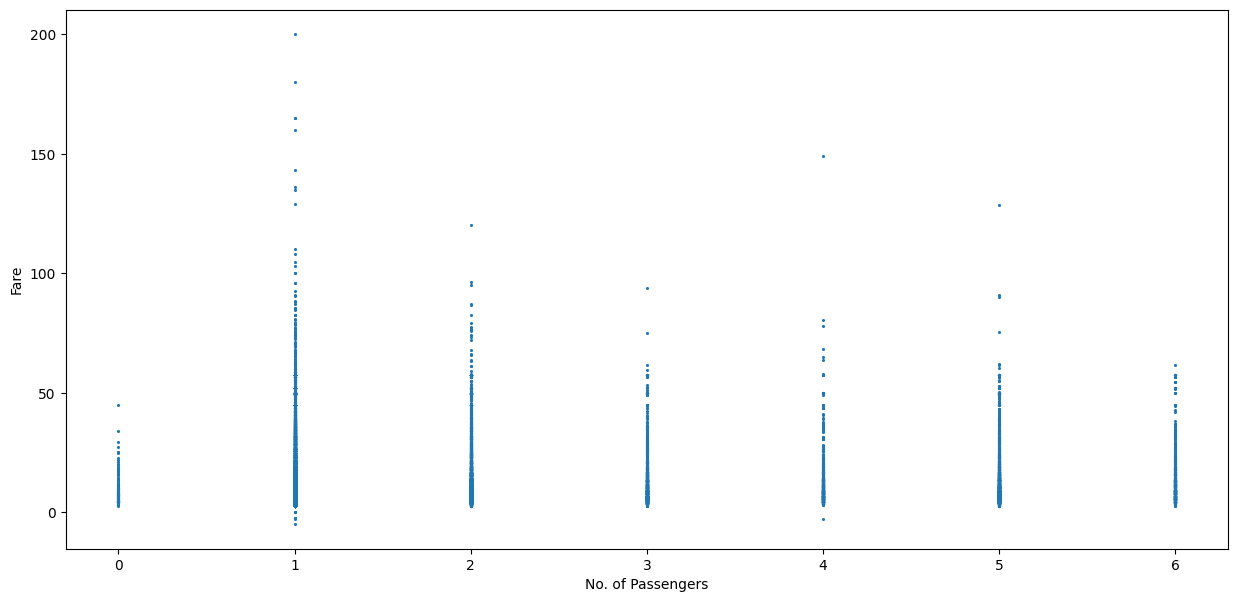

In [393]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['no_of_passenger'], y=df['amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

WE CAN SEE THAT SINGLE PASSENGER ARE MOST FREQUENT AND MOST AMOUNT IS PAID BY THEM ONLY


2. Does the date and time of pickup affect the fare?

----->NO


Text(0, 0.5, 'Fare')

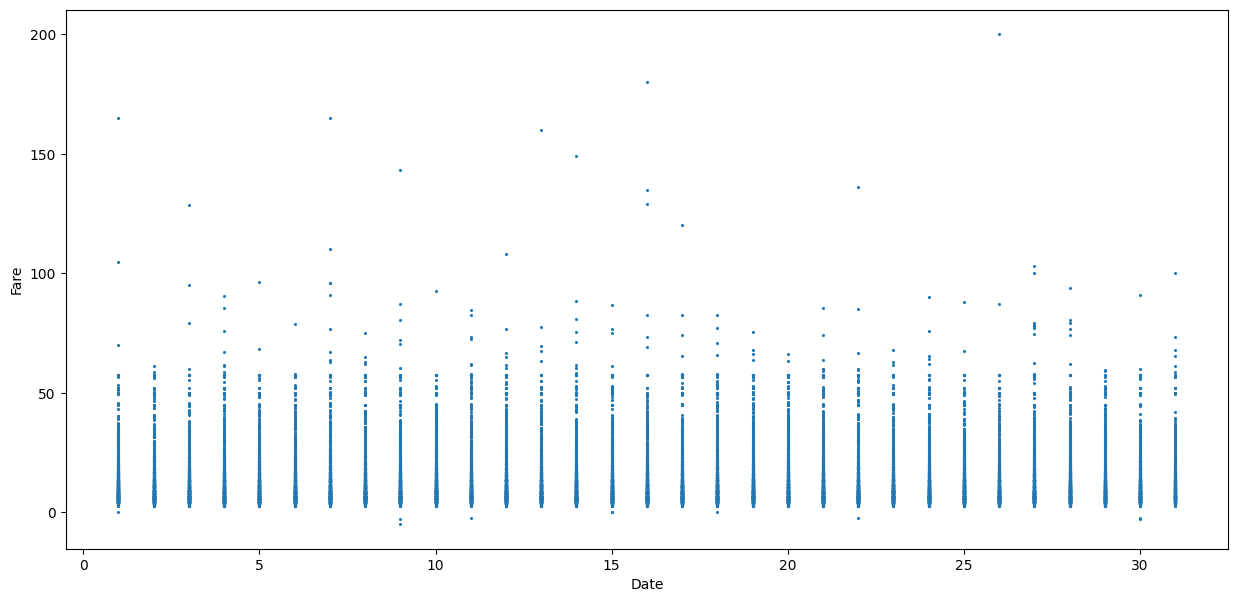

In [394]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Date'], y=df['amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0, 0.5, 'Frequency')

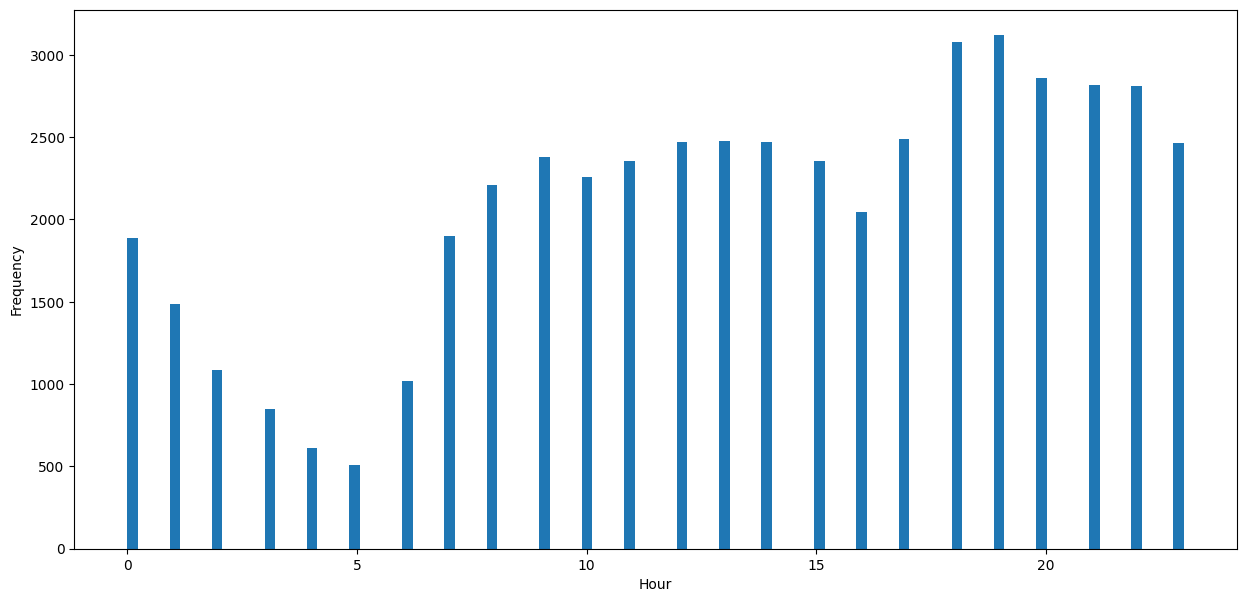

In [395]:
plt.figure(figsize=(15,7))
plt.hist(df['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

 The frequency of cab rides seem to be the lowest at 5AM and the highest at 7PM.

Text(0, 0.5, 'Fare')

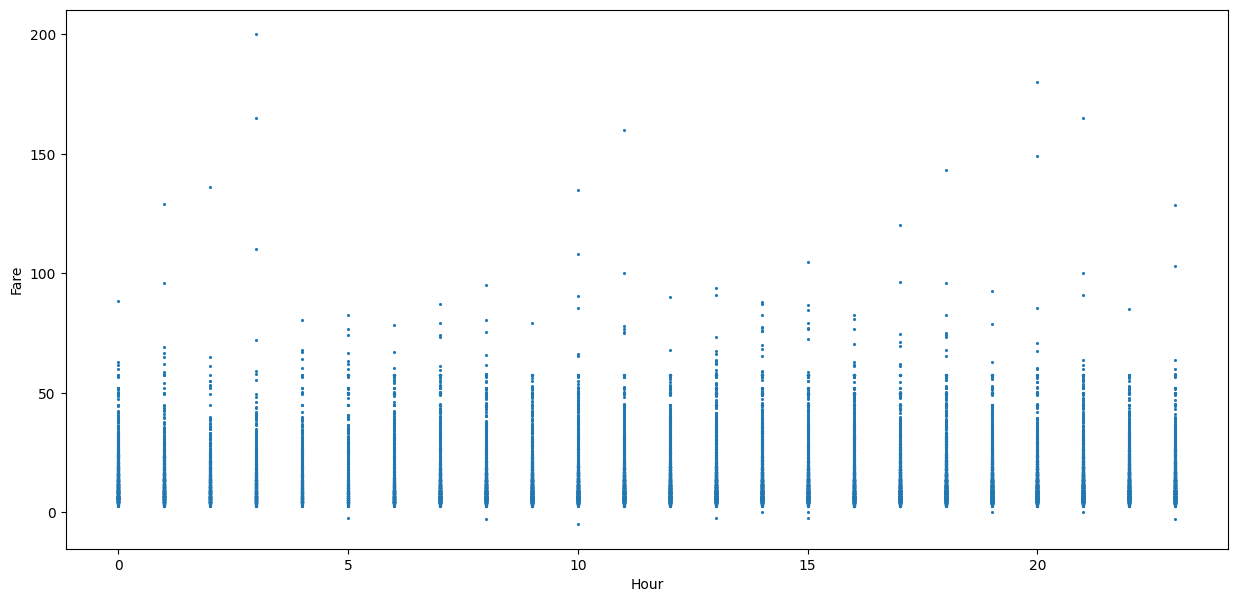

In [396]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Hour'], y=df['amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

3. Does the day of the week affect the fare?
---> Highest on Sunday
     Lowest on Tuesday

Text(0, 0.5, 'Frequency')

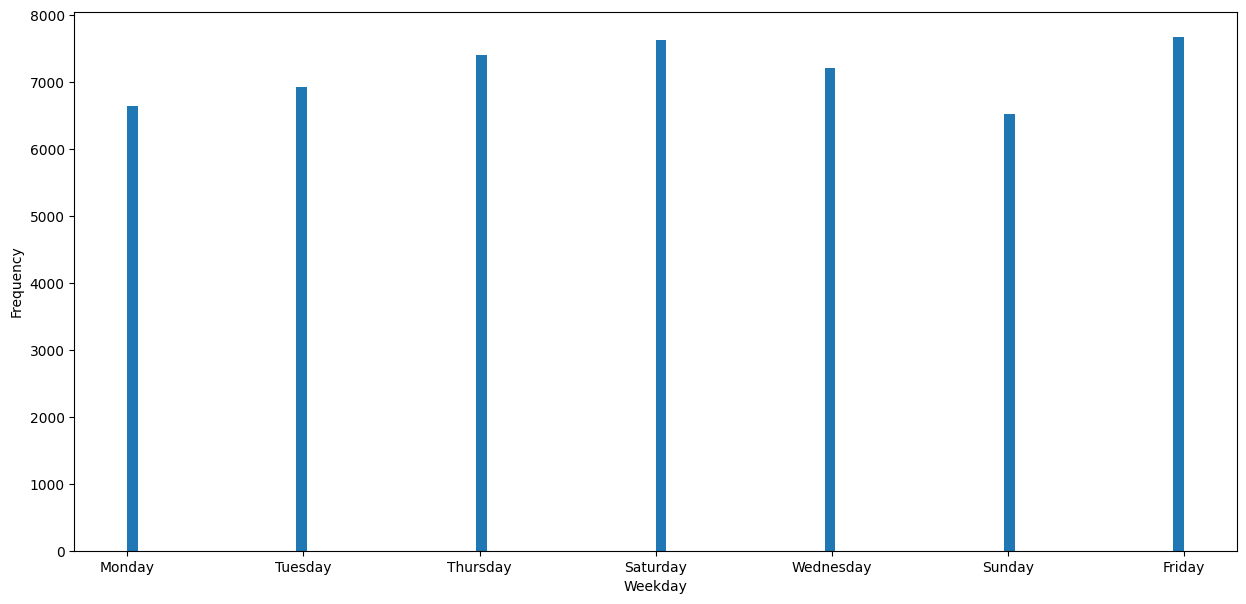

In [397]:
plt.figure(figsize=(15,7))
plt.hist(df['Weekday'], bins=100)
plt.xlabel('Weekday')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

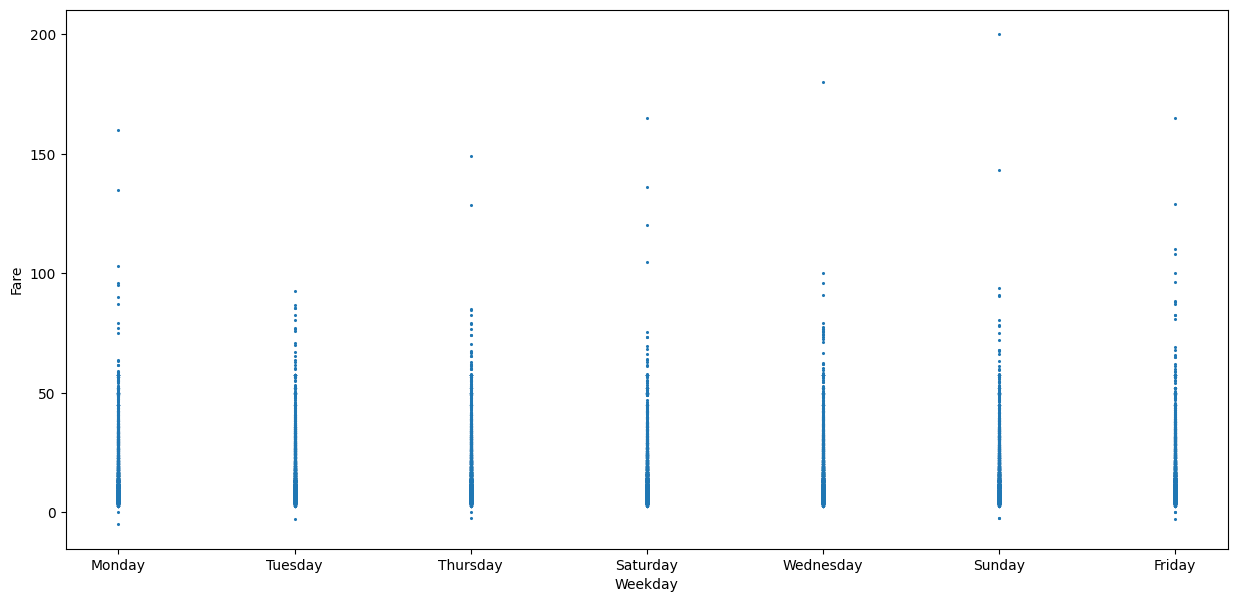

In [398]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Weekday'], y=df['amount'], s=1.5)
plt.xlabel('Weekday')
plt.ylabel('Fare')

In [399]:
bins_0 = df.loc[(df['haversine_distance'] == 0),     ['haversine_distance']]
bins_1 = df.loc[(df['haversine_distance'] > 0) &  (df['haversine_distance'] <= 10), ['haversine_distance']]
bins_2 = df.loc[(df['haversine_distance'] > 10) & (df['haversine_distance'] <= 50), ['haversine_distance']]
bins_3 = df.loc[(df['haversine_distance'] > 50) & (df['haversine_distance'] <= 100),['haversine_distance']]
bins_4 = df.loc[(df['haversine_distance'] > 100) &(df['haversine_distance'] <= 200),['haversine_distance']]
bins_5 = df.loc[(df['haversine_distance'] > 200)] 
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '>200'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5])

In [400]:
dist_bins.columns

Index(['haversine_distance', 'bins', 'amount', 'date_time_of_pickup',
       'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff',
       'latitude_of_dropoff', 'no_of_passenger', 'Hour', 'Weekday', 'Date',
       'Month', 'Day'],
      dtype='object')

Text(0, 0.5, 'Frequency')

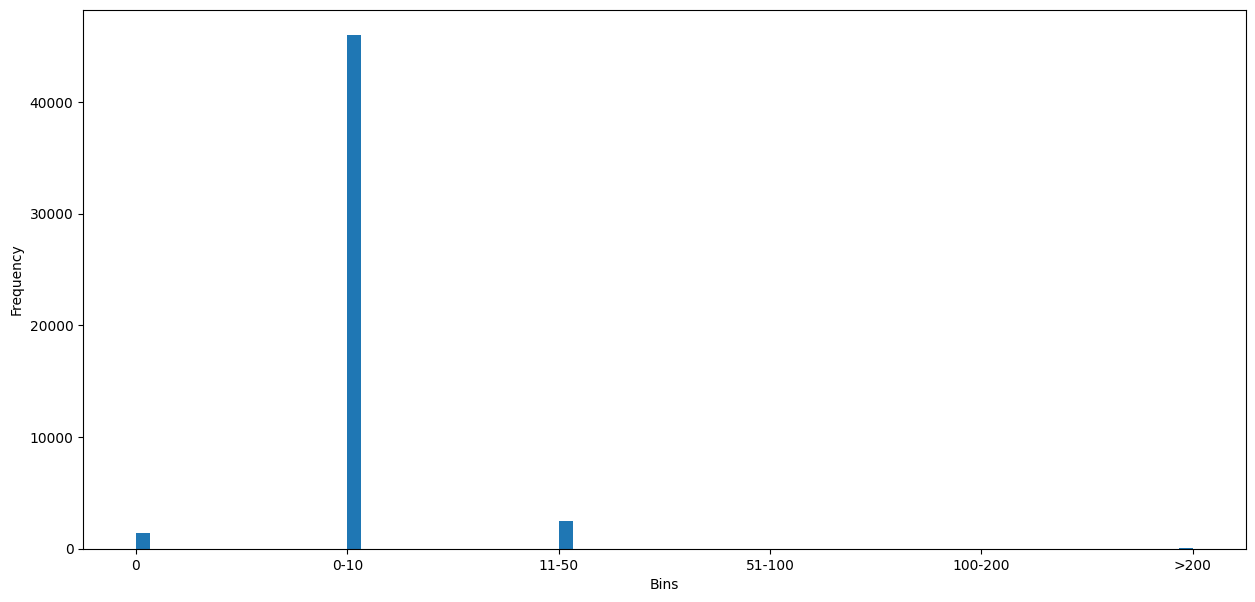

In [401]:
plt.figure(figsize=(15,7))
plt.hist(dist_bins['bins'], bins=75)
plt.xlabel('Bins')
plt.ylabel('Frequency')

In [402]:
from collections import Counter

In [403]:
Counter(dist_bins['bins'])

Counter({'0': 1449,
         '0-10': 45970,
         '11-50': 2461,
         '51-100': 13,
         '100-200': 13,
         '>200': 94})

In [404]:
high_distance = df.loc[(df['haversine_distance']>200)&(df['amount']!=0)]
high_distance

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,haversine_distance,Hour,Weekday,Date,Month,Day
472,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,22,Sunday,22,2,6
1260,5.7,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,20,Thursday,10,3,3
2280,8.9,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,8,Monday,29,8,0
2397,45.0,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,17,Sunday,24,6,6
4278,7.0,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,23,Tuesday,7,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47311,10.1,2011-02-20 01:14:37+00:00,0.000000,0.000000,-73.948825,40.724458,2,8662.570693,1,Sunday,20,2,6
47804,10.0,2012-11-02 22:12:00+00:00,-73.963227,40.762127,0.000000,0.000000,2,8664.535856,22,Friday,2,11,4
48058,8.5,2012-05-18 09:40:00+00:00,-0.001667,0.000000,-73.980498,40.751142,3,8665.602469,9,Friday,18,5,4
48996,49.8,2012-05-12 10:48:00+00:00,-74.014917,40.713382,0.000000,0.000000,1,8667.818812,10,Saturday,12,5,5


In [405]:
high_distance['haversine_distance'] = high_distance.apply(
    lambda row: (row['amount'] - 2.50)/1.56,
    axis=1
)

In [406]:
high_distance

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,haversine_distance,Hour,Weekday,Date,Month,Day
472,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,22,Sunday,22,2,6
1260,5.7,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,20,Thursday,10,3,3
2280,8.9,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,8,Monday,29,8,0
2397,45.0,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,27.243590,17,Sunday,24,6,6
4278,7.0,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,2.884615,23,Tuesday,7,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47311,10.1,2011-02-20 01:14:37+00:00,0.000000,0.000000,-73.948825,40.724458,2,4.871795,1,Sunday,20,2,6
47804,10.0,2012-11-02 22:12:00+00:00,-73.963227,40.762127,0.000000,0.000000,2,4.807692,22,Friday,2,11,4
48058,8.5,2012-05-18 09:40:00+00:00,-0.001667,0.000000,-73.980498,40.751142,3,3.846154,9,Friday,18,5,4
48996,49.8,2012-05-12 10:48:00+00:00,-74.014917,40.713382,0.000000,0.000000,1,30.320513,10,Saturday,12,5,5


In [407]:
df.update(high_distance)

In [408]:
df[df['haversine_distance']==0]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,haversine_distance,Hour,Weekday,Date,Month,Day
11,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,11.0,Monday,24.0,12.0,0.0
15,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,12.0,Saturday,23.0,11.0,5.0
26,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,20.0,Monday,7.0,2.0,0.0
105,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,0.0,Wednesday,25.0,3.0,2.0
124,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,17.0,Thursday,17.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49816,4.9,2012-02-20 00:54:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,Monday,20.0,2.0,0.0
49845,6.6,2009-03-02 21:57:15+00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,21.0,Monday,2.0,3.0,0.0
49856,10.9,2010-04-19 17:25:00+00:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,17.0,Monday,19.0,4.0,0.0
49967,20.5,2014-06-09 21:31:34+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,21.0,Monday,9.0,6.0,0.0


CASE 1: DISTANCE AND FARE BOTH ARE 0


In [409]:
df[(df['haversine_distance']==0)&(df['amount']==0)]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,haversine_distance,Hour,Weekday,Date,Month,Day


CASE 2: Fare is not 0 and is less than the base amount, but Distance is 0. 

In [410]:
rush_hour = df.loc[(((df['Hour']>=6)&(df['Hour']<=20))  & (df['haversine_distance']==0) & (df['amount'] < 2.5))]
rush_hour

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,haversine_distance,Hour,Weekday,Date,Month,Day


In [411]:
non_rush_hour = df.loc[(((df['Hour']<6)|(df['Hour']>20))  & (df['haversine_distance']==0) & (df['amount'] < 3.0))]
non_rush_hour

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,haversine_distance,Hour,Weekday,Date,Month,Day
376,2.5,2014-05-29 05:57:22+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,5.0,Thursday,29.0,5.0,3.0
472,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,22.0,Sunday,22.0,2.0,6.0
503,2.5,2010-01-19 01:10:00+00:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,1.0,Tuesday,19.0,1.0,1.0
657,2.5,2009-08-25 01:50:21+00:00,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,1.0,Tuesday,25.0,8.0,1.0
1419,2.5,2013-07-21 00:10:23+00:00,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,0.0,Sunday,21.0,7.0,6.0
3168,2.5,2012-07-06 22:07:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,22.0,Friday,6.0,7.0,4.0
9621,2.5,2015-03-01 22:39:54+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,22.0,Sunday,1.0,3.0,6.0
11593,2.9,2010-10-17 04:28:00+00:00,-73.851972,40.679820,-73.851972,40.679820,5.0,0.0,4.0,Sunday,17.0,10.0,6.0
12953,2.9,2010-07-23 03:30:08+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,3.0,Friday,23.0,7.0,4.0
16074,2.5,2013-05-30 00:19:40+00:00,-73.782520,40.644488,-73.782520,40.644488,1.0,0.0,0.0,Thursday,30.0,5.0,3.0


In [412]:
weekends = df.loc[((df['Weekday']=='Sunday') | (df['Weekday']=='Saturday')) & (df['haversine_distance']==0) & (df['amount'] < 3.0)]
weekends

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,haversine_distance,Hour,Weekday,Date,Month,Day
472,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,22.0,Sunday,22.0,2.0,6.0
1419,2.5,2013-07-21 00:10:23+00:00,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,0.0,Sunday,21.0,7.0,6.0
4954,2.5,2010-01-10 13:44:35+00:00,-73.983934,40.754938,-73.983934,40.754938,1.0,0.0,13.0,Sunday,10.0,1.0,6.0
5449,2.5,2010-07-17 06:24:04+00:00,-73.934094,40.751906,-73.934094,40.751906,1.0,0.0,6.0,Saturday,17.0,7.0,5.0
9621,2.5,2015-03-01 22:39:54+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,22.0,Sunday,1.0,3.0,6.0
10458,2.5,2013-02-23 20:58:00+00:00,-73.979678,40.765962,0.000000,0.000000,1.0,0.0,20.0,Saturday,23.0,2.0,5.0
11593,2.9,2010-10-17 04:28:00+00:00,-73.851972,40.679820,-73.851972,40.679820,5.0,0.0,4.0,Sunday,17.0,10.0,6.0
13221,2.5,2012-09-29 08:56:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,8.0,Saturday,29.0,9.0,5.0
14763,2.9,2009-11-07 14:29:14+00:00,-73.965505,40.806097,-73.965505,40.806097,1.0,0.0,14.0,Saturday,7.0,11.0,5.0
21427,2.5,2011-08-21 12:28:36+00:00,-73.948750,40.744915,-73.948750,40.744915,1.0,0.0,12.0,Sunday,21.0,8.0,6.0


CASE 3:Fare is 0, but Distance is not 0. These values need to be imputed.

In [413]:
c3=df.loc[(df['haversine_distance']!=0) & (df['amount']==0)]
c3

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,haversine_distance,Hour,Weekday,Date,Month,Day
10002,0.0,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184763,14.0,Monday,15.0,2.0,0.0
27891,0.0,2015-05-15 21:40:28+00:00,-74.077927,40.805714,-74.077919,40.805721,1.0,0.001064,21.0,Friday,15.0,5.0,4.0
47302,0.0,2010-03-18 19:13:39+00:00,-73.942346,40.806269,-73.942463,40.806129,1.0,0.018420,19.0,Thursday,18.0,3.0,3.0


In [414]:
c3.sort_values('haversine_distance', ascending=False)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,haversine_distance,Hour,Weekday,Date,Month,Day
10002,0.0,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184763,14.0,Monday,15.0,2.0,0.0
47302,0.0,2010-03-18 19:13:39+00:00,-73.942346,40.806269,-73.942463,40.806129,1.0,0.018420,19.0,Thursday,18.0,3.0,3.0
27891,0.0,2015-05-15 21:40:28+00:00,-74.077927,40.805714,-74.077919,40.805721,1.0,0.001064,21.0,Friday,15.0,5.0,4.0


In [415]:
c3['amount'] = c3.apply(
    lambda row: ((row['haversine_distance'] * 1.56) + 2.50), axis=1
)

In [416]:
c3['amount']

10002    7.468230
27891    2.501660
47302    2.528736
Name: amount, dtype: float64

In [417]:
df.update(c3)

CASE 3: Fare is not 0, but Distance is 0. These values need to be imputed.

In [418]:
df.loc[(df['haversine_distance']==0) & (df['amount']!=0)]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,haversine_distance,Hour,Weekday,Date,Month,Day
11,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,11.0,Monday,24.0,12.0,0.0
15,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,12.0,Saturday,23.0,11.0,5.0
26,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,20.0,Monday,7.0,2.0,0.0
105,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,0.0,Wednesday,25.0,3.0,2.0
124,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,17.0,Thursday,17.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49816,4.9,2012-02-20 00:54:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,Monday,20.0,2.0,0.0
49845,6.6,2009-03-02 21:57:15+00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,21.0,Monday,2.0,3.0,0.0
49856,10.9,2010-04-19 17:25:00+00:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,17.0,Monday,19.0,4.0,0.0
49967,20.5,2014-06-09 21:31:34+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,21.0,Monday,9.0,6.0,0.0


In [419]:
c4 = df.loc[(df['haversine_distance']==0) & (df['amount']!=0)]

In [420]:
c4.loc[(c4['amount']<=3.0)&(c4['haversine_distance']==0)]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,haversine_distance,Hour,Weekday,Date,Month,Day
376,2.5,2014-05-29 05:57:22+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,5.0,Thursday,29.0,5.0,3.0
472,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,22.0,Sunday,22.0,2.0,6.0
503,2.5,2010-01-19 01:10:00+00:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,1.0,Tuesday,19.0,1.0,1.0
657,2.5,2009-08-25 01:50:21+00:00,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,1.0,Tuesday,25.0,8.0,1.0
799,3.0,2013-12-08 23:39:00+00:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,23.0,Sunday,8.0,12.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48049,2.5,2012-12-15 06:43:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,6.0,Saturday,15.0,12.0,5.0
48446,2.5,2009-09-12 01:18:00+00:00,-73.987660,40.762120,-73.987660,40.762120,1.0,0.0,1.0,Saturday,12.0,9.0,5.0
48454,2.5,2015-06-18 21:51:07+00:00,-73.776413,40.646133,-73.776413,40.646133,1.0,0.0,21.0,Thursday,18.0,6.0,3.0
48879,2.5,2009-07-07 14:49:00+00:00,-74.013322,40.712017,-74.013322,40.712017,1.0,0.0,14.0,Tuesday,7.0,7.0,1.0


In [421]:
c4.loc[(c4['amount']>3.0)&(c4['haversine_distance']==0)]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,haversine_distance,Hour,Weekday,Date,Month,Day
11,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,11.0,Monday,24.0,12.0,0.0
15,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,12.0,Saturday,23.0,11.0,5.0
26,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,20.0,Monday,7.0,2.0,0.0
105,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,0.0,Wednesday,25.0,3.0,2.0
124,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,17.0,Thursday,17.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49816,4.9,2012-02-20 00:54:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,Monday,20.0,2.0,0.0
49845,6.6,2009-03-02 21:57:15+00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,21.0,Monday,2.0,3.0,0.0
49856,10.9,2010-04-19 17:25:00+00:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,17.0,Monday,19.0,4.0,0.0
49967,20.5,2014-06-09 21:31:34+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,21.0,Monday,9.0,6.0,0.0


In [422]:
c4_sub = c4.loc[(c4['amount']>3.0)&(c4['haversine_distance']==0)]

In [423]:
c4_sub['haversine_distance'] = c4_sub.apply(
lambda row: ((row['amount']-2.50)/1.56), axis=1
)

In [424]:
df.update(c4_sub)

In [425]:
df=df.drop(['date_time_of_pickup'],axis=1)

In [426]:
df=pd.get_dummies(df)

In [427]:
X=df.drop("amount",axis=1)
y=df["amount"]

In [428]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [429]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(max_depth=1)

In [430]:
model1.fit(X_train,y_train)

RandomForestRegressor(max_depth=1)

In [431]:
model1.score(X_train,y_train)

0.5495948319869024

In [432]:
model1.score(X_test,y_test)

0.5422527173804733

In [433]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(max_depth=1)

In [434]:
model2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [435]:
model2.score(X_train,y_train)

0.5264972851401182

In [436]:
model2.score(X_test,y_test)

0.5228905125212369

In [437]:
from sklearn.ensemble import BaggingRegressor
model3=BaggingRegressor(n_estimators=2,base_estimator=model2)

In [438]:
model3.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                 n_estimators=2)

In [439]:
model3.score(X_train,y_train)

0.535148677245243

In [440]:
model3.score(X_test,y_test)

0.5325713153066285

In [441]:
from sklearn.ensemble import AdaBoostRegressor
model4=AdaBoostRegressor(n_estimators=1,base_estimator=model2)

In [442]:
model4.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  n_estimators=1)

In [443]:
model4.score(X_train,y_train)

0.5264880353346048

In [444]:
model4.score(X_test,y_test)

0.5228961371723474

In [445]:
from sklearn.svm import SVC